In [7]:

import re
from string import punctuation

import nltk
import plotly.express as px
from nltk import word_tokenize
from nltk.corpus import stopwords
from umap import UMAP

In [15]:
def preprocess_sentence_returns_list(text):
    stop_words = set(stopwords.words('english'))
    # stop_words.extend(['from', 'subject', 're', 'edu', 'use','figure', 'fig'])
    # stemmer = SnowballStemmer("english")
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    cleanr = re.compile('\[(.*?)\]')
    text = re.sub(cleanr, '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub("[0-9]{2}", '', text)
    text = text.replace('/', ' ')
    text = text.replace('\'', ' \' ')
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
    text = re.sub(pat, '', text)
    text = text.lower()

    # Tokenise the text - try with bert tokeniser later
    words = word_tokenize(text)
    # words = text.split()
    # text = ' '.join([stemmer.stem(word) for word in words])
    # words = [stemmer.stem(word) for word in words]
    text = ' '.join([lem.lemmatize(word) for word in words])
    # text = ' '.join(words)
    text = ' '.join([w for w in text.split() if len(w) > 1])
    text = text.replace('/`/', '')
    text = text.replace('/"/', '')
    text = text.replace("/'/", "")

    tokens = [token for token in word_tokenize(text) if token not in punctuation and token not in stop_words]
    return tokens

In [9]:


# embedding = TransformerWordEmbeddings("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract")




In [16]:
def generate_word_embeddings():
    with open('../articles_data/all_articles_with_thumbnail_metadata.json') as f:
        papers = json.load(f)

    # To encode the papers, we must combine the title and the abstracts to a single string
    article_texts = [preprocess_sentence_returns_list(paper['article_title'] + ' ' + paper['abstract']) for paper in
                     papers]
    article_titles = [preprocess_sentence_returns_list(paper['article_title']) for paper in papers]
    return article_titles, article_texts



In [17]:
processed_titles, processed_content = generate_word_embeddings()
# List of list to list
flat_list = [item for sublist in processed_content for item in sublist]




In [25]:
from collections import Counter

count = Counter(flat_list)
tagged_words = nltk.pos_tag(flat_list)
words = [word for word, pos in tagged_words if
         (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]



In [26]:

unique_words = list(set(item for item in words))
len(unique_words)

2216

In [ ]:
tagged_words = nltk.pos_tag(flat_list)
words = [word for word, pos in tagged_words if
         (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS' or pos == 'CD')]
unique_words = list(set(item for item in words if flat_list.count(item) > 3))
len(unique_words)


KeyboardInterrupt



In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

In [71]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

In [72]:
import plotly.io as pio

word_embeddings = model.encode(unique_words, convert_to_tensor=True)
umap_embeddings = UMAP(n_neighbors=5, n_components=2, metric='cosine', random_state=42)
low_dim_embeddings = umap_embeddings.fit_transform(word_embeddings)
pio.renderers.default = "browser"
fig = px.scatter(low_dim_embeddings, x=0, y=1, opacity=1, hover_name=unique_words)
fig.show()

SyntaxError: unmatched '}' (3875660430.py, line 2)

In [11]:
from flair.data import Sentence
from flair.models import MultiTagger
from flair.tokenization import SciSpacyTokenizer

# make a sentence and tokenize with SciSpaCy
sentence = Sentence("Behavioral abnormalities in the Fmr1 KO2 Mouse Model of Fragile X Syndrome",
                    use_tokenizer=SciSpacyTokenizer())

# load biomedical tagger
tagger = MultiTagger.load("hunflair")



[Token[0]: "Behavioral",
 Token[1]: "abnormalities",
 Token[2]: "in",
 Token[3]: "the",
 Token[4]: "Fmr1",
 Token[5]: "KO2",
 Token[6]: "Mouse",
 Token[7]: "Model",
 Token[8]: "of",
 Token[9]: "Fragile",
 Token[10]: "X",
 Token[11]: "Syndrome"]

In [16]:
# tag sentence
tagger.predict(sentence)
x = []
for annotation_layer in sentence.annotation_layers.keys():
    for entity in sentence.get_spans(annotation_layer):
        x.append(entity.tokens)

AttributeError: 'list' object has no attribute 'values'

In [30]:

import spacy
import json

nlp = spacy.load("en_core_sci_sm")
text = """
Myeloid derived suppressor cells (MDSC) are immature
myeloid cells with immunosuppressive activity.
They accumulate in tumor-bearing mice and humans
with different types of cancer, including hepatocellular
carcinoma (HCC).

"""


def generate_word_embeddings():
    with open('../articles_data/all_articles_with_thumbnail_metadata.json') as f:
        papers = json.load(f)

    # To encode the papers, we must combine the title and the abstracts to a single string
    article_texts = [nlp(paper['article_title'] + ' ' + paper['abstract']) for paper in
                     papers]
    article_titles = [nlp(paper['article_title']) for paper in papers]
    return [title for sublist in article_texts for title in sublist.ents]


entities = generate_word_embeddings()

#
# doc = nlp(text)
#
# entity_and_label = list(set(doc.ents))
# entity_and_label

In [35]:
len(entities)
import nltk

# tagged_words = nltk.pos_tag(entities)
# words = [word for word, pos in tagged_words if
#          (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS' or pos == 'CD' or
#           pos == 'FW')]
entities = ['ab', 'ab', 'ab', 'cd']
unique_words = list(set(item for item in entities if entities.count(item) > 2))
len(unique_words)

1

In [29]:
entities

[Visual Assessment,
 Growth Prediction,
 Brain Structures,
 Pediatric Radiotherapy,
 Pediatric,
 research,
 investigating,
 radiation,
 influences,
 development,
 function,
 patient's,
 brain,
 brain growth,
 treatment,
 brain structures,
 patient,
 analyzed,
 pre-,
 post-treatment,
 anatomical changes,
 period,
 assessed,
 early,
 markers,
 cognitive,
 functional,
 damage,
 automated,
 visual assessment,
 growth prediction,
 brain structures,
 pediatric,
 brain tumor radiotherapy,
 patients,
 re-segmentation,
 time,
 pre-treatment Computed Tomography,
 scans,
 manual delineations,
 segmentation masks,
 brain structures,
 pre-treatment,
 initialization,
 multiple,
 post-treatment,
 MR,
 images,
 active contour model,
 accuracy,
 quantification,
 automatically,
 posttreatment,
 SVR,
 features,
 geometry,
 intensity,
 gradients,
 pre-treatment,
 data,
 distance,
 distances,
 pre-,
 post-treatment,
 data,
 growth,
 brain structure,
 accuracy,
 segmentations,
 larger structures,
 growth be

In [14]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

In [25]:
import plotly.io as pio

word_embeddings = model.encode(unique_words, convert_to_tensor=True)
umap_embeddings = UMAP(n_neighbors=5, n_components=2, metric='cosine', random_state=42)
low_dim_embeddings = umap_embeddings.fit_transform(word_embeddings)
pio.renderers.default = "browser"
fig = px.scatter(low_dim_embeddings, x=0, y=1, opacity=1, hover_name=entities)
fig.show()

RuntimeError: stack expects a non-empty TensorList

In [7]:
!pip install wordcloud

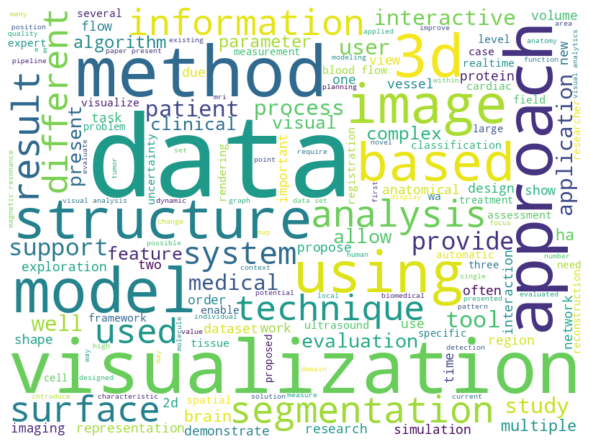

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = flat_list

wordcloud = WordCloud(width=800, height=600,
                      background_color='white',
                      min_font_size=10,
                      max_words=200).generate(text)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [52]:
from scispacy import custom_tokenizer

# nlp = spacy.load("en_core_sci_sm")
# doc = nlp("Alterations in the hypocretin receptor 2 and preprohypocretin genes produce narcolepsy in some animals.")
x = custom_tokenizer(
    "Alterations in the hypocretin receptor 2 and preprohypocretin genes produce narcolepsy in some animals.")
x


TypeError: 'module' object is not callable